In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

from reflax.data_analysis.superlets import adaptive_superlet_transform

# use CPU
import jax
jax.config.update('jax_platform_name', 'cpu')

2025-01-13 13:51:43.524404: W external/xla/xla/service/platform_util.cc:206] unable to create StreamExecutor for CUDA:7: : CUDA_ERROR_OUT_OF_MEMORY: out of memory


In [2]:
t_max = 1
sampling_freq = 100
t = jnp.linspace(0, t_max, int(t_max * sampling_freq))

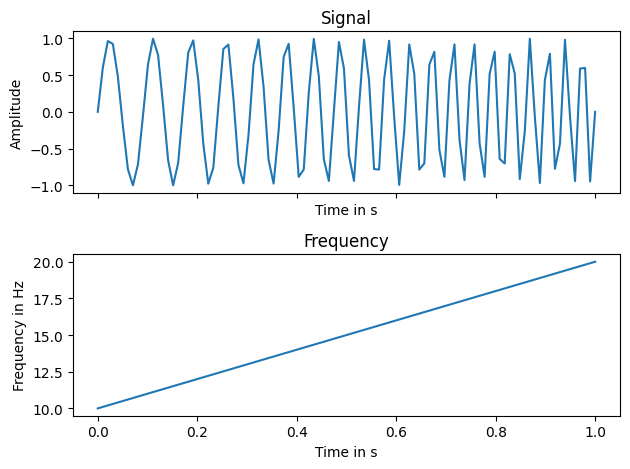

In [3]:
# create a signal with linearly increasing frequency
f = 10 + 10 * t
signal = jnp.sin(2 * jnp.pi * f * t)

# plot the signal
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, signal)
ax1.set_title("Signal")
ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Time in s")

# plot frequency over time
ax2.plot(t, f)
ax2.set_title("Frequency")
ax2.set_ylabel("Frequency in Hz")
ax2.set_xlabel("Time in s")

plt.tight_layout()

In [4]:
freqs = jnp.linspace(5, 25, 100)

E0113 13:51:46.221731 1665711 pjrt_stream_executor_client.cc:3085] Execution of replica 0 failed: RESOURCE_EXHAUSTED: CUDA driver ran out of memory trying to instantiate CUDA graph with 100 nodes and 0 conditionals (total of 0 alive CUDA graphs in the process). You can try to (a) Give more memory to CUDA driver by reducing XLA_CLIENT_MEM_FRACTION (b) Disable CUDA graph with 'XLA_FLAGS=--xla_gpu_enable_command_buffer=' (empty set). Original error: Failed to instantiate CUDA graph: CUDA_ERROR_OUT_OF_MEMORY: out of memory


XlaRuntimeError: RESOURCE_EXHAUSTED: CUDA driver ran out of memory trying to instantiate CUDA graph with 100 nodes and 0 conditionals (total of 0 alive CUDA graphs in the process). You can try to (a) Give more memory to CUDA driver by reducing XLA_CLIENT_MEM_FRACTION (b) Disable CUDA graph with 'XLA_FLAGS=--xla_gpu_enable_command_buffer=' (empty set). Original error: Failed to instantiate CUDA graph: CUDA_ERROR_OUT_OF_MEMORY: out of memory

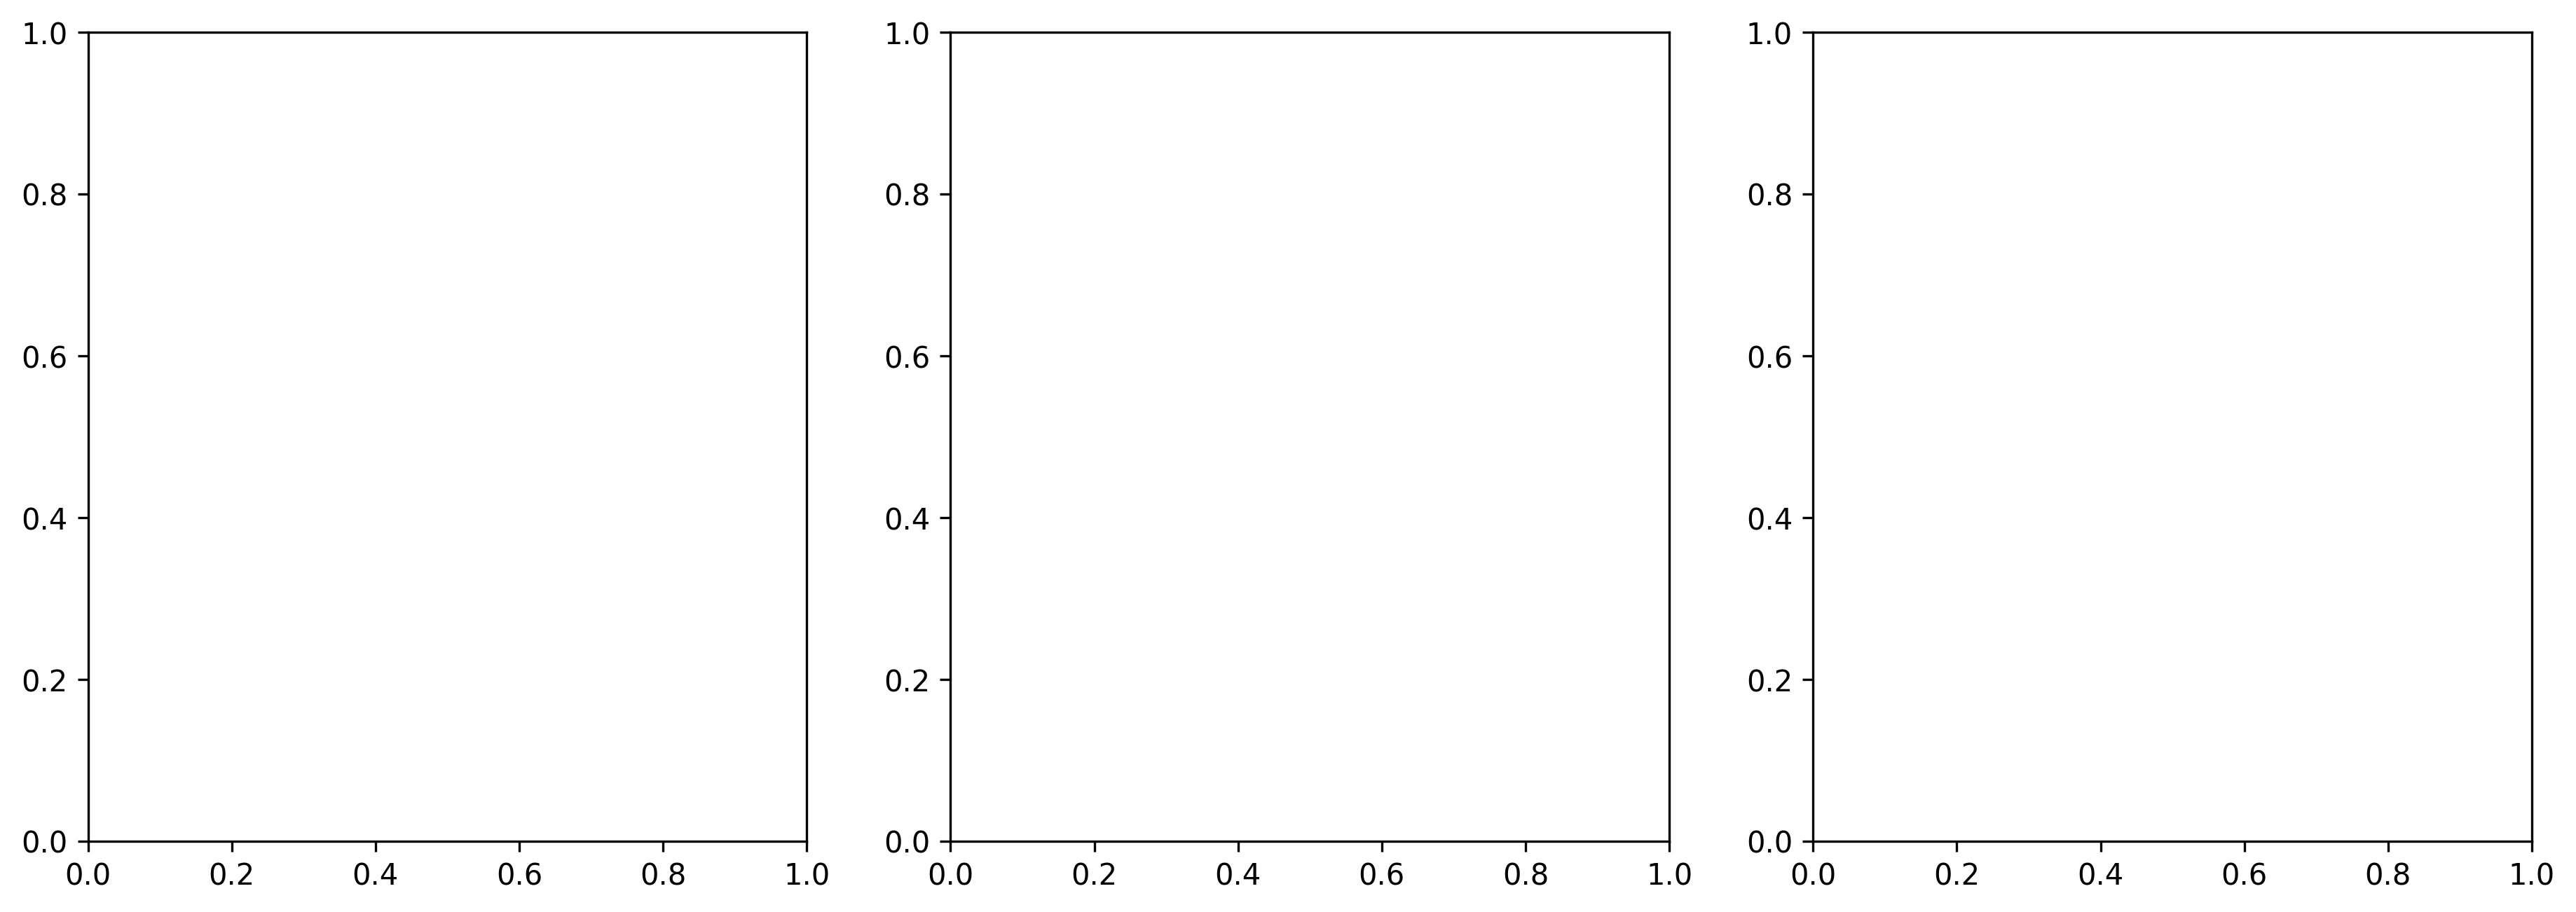

In [5]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5), dpi=300)

for (i, (base_cycle, min_order, max_order)) in enumerate(zip([3, 5, 1], [1, 1, 5], [30, 30, 40])):
    scalogram = adaptive_superlet_transform(signal, freqs, sampling_freq=sampling_freq, 
                                        base_cycle=base_cycle, min_order=min_order, max_order=max_order, mode="add")
    ax[i].imshow(jnp.abs(scalogram)**2, aspect=1/40, cmap="jet", interpolation="none", origin="lower", extent=[0, len(signal)/sampling_freq, freqs[0], freqs[-1]])
    ax[i].set_title(f"Base cycles: {base_cycle}, Orders: {min_order}-{max_order}")
    ax[i].set_xlabel("Time (s)")
    ax[i].set_ylabel("Frequency (Hz)")